### IMPORTS

In [37]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
SAVE_PATH = "../saves/"

In [40]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [41]:
savefiles = [file for file in os.listdir(SAVE_PATH)] 
savefiles

['pareto.csv',
 'saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv',
 'saves_1710429089587.csv',
 'saves_1710429514728.csv',
 'saves_1710429727788.csv',
 'saves_1710429865873.csv',
 'saves_1710429985239.csv',
 'saves_1710430130919.csv',
 'saves_1710430150347.csv',
 'saves_1710430307672.csv',
 'saves_1710430871920.csv',
 'saves_1710431208782.csv',
 'saves_1710433005888.csv',
 'saves_1710433038829.csv',
 'saves_1710433067539.csv',
 'saves_1710433104086.csv',
 'saves_1710433145786.csv',
 'saves_1710433231572.csv',
 'saves_1710433284422.csv',
 'saves_1710433317750.csv',
 'saves_1710433333342.csv',
 'saves_1710433396034.csv',
 'saves_1710433430620.csv',
 'saves_1710433540895.csv',
 'saves_1710433601737.csv',
 'saves_1710433642142.csv',
 'saves_1710433666142.csv',
 'saves_1710433698580.csv',
 'saves_1710433876094.csv',
 'saves_1710436421269.csv',
 'saves_1710436501194.csv',
 'saves_1710437276237.csv',
 'sav

### VISUALIZATION

In [44]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,2049,7254,9303,"[50,143,129,162,19,87,121,178,127,132,130,84,7...",True
1,2067,7236,9303,"[50,190,121,162,19,90,149,178,111,132,130,84,7...",True
2,2065,7245,9310,"[50,190,121,162,19,90,149,178,127,132,130,84,7...",True
3,2088,7223,9311,"[50,190,121,178,147,9,149,19,172,12,130,84,77,...",True
4,2042,7271,9313,"[146,118,129,162,19,87,121,178,127,132,130,84,...",True
...,...,...,...,...,...
422,9737,6529,16266,"[73,174,23,136,149,18,59,57,132,152,163,86,12,...",True
423,9780,6528,16308,"[73,174,23,136,149,36,59,57,132,152,163,86,12,...",True
424,9780,6528,16308,"[73,174,23,136,149,36,59,57,132,152,163,86,12,...",True
425,9831,6527,16358,"[50,174,23,136,149,36,59,57,132,152,163,86,12,...",True


In [45]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    if "index" in contracts.columns:
        contracts = contracts.drop(columns=["index"])
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
        print(savefile, "saved without index")
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto = pareto.drop_duplicates()

pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
0,2049,7254,9303,"[50,143,129,162,19,87,121,178,127,132,130,84,7...",True
7,2067,7236,9303,"[50,190,121,162,19,90,149,178,111,132,130,84,7...",True
60,2065,7245,9310,"[50,190,121,162,19,90,149,178,127,132,130,84,7...",True
6,2088,7223,9311,"[50,190,121,178,147,9,149,19,172,12,130,84,77,...",True
3,2042,7271,9313,"[146,118,129,162,19,87,121,178,127,132,130,84,...",True
...,...,...,...,...,...
417,9440,6531,15971,"[73,174,23,136,149,80,59,57,132,75,163,86,151,...",True
419,9491,6530,16021,"[50,174,23,136,149,80,59,57,132,75,163,86,151,...",True
421,9737,6529,16266,"[73,174,23,136,149,18,59,57,132,152,163,86,12,...",True
423,9780,6528,16308,"[73,174,23,136,149,36,59,57,132,152,163,86,12,...",True


(1001.55, 10251.45, 6395.75, 9283.25)

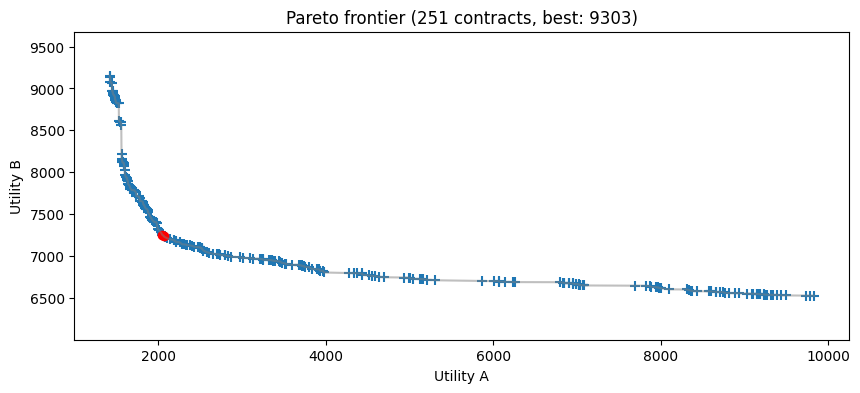

In [46]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto[pareto["utilSum"] == pareto["utilSum"].min()]
plt.figure(figsize=(10,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {pareto["utilSum"].min()})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")